In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

Text(0.5,1,' Logistic Function ')

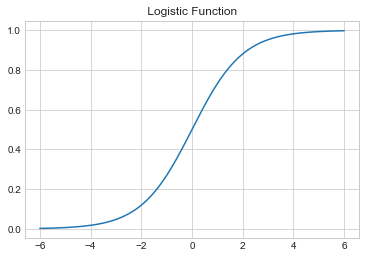

In [3]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

In [5]:
df = sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [8]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [9]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [10]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


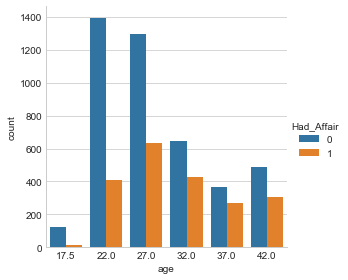

In [12]:
sns.factorplot('age', data = df, hue = 'Had_Affair', kind = 'count')

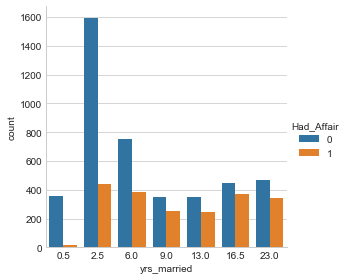

In [13]:
sns.factorplot('yrs_married', data = df, hue = 'Had_Affair', kind = 'count')

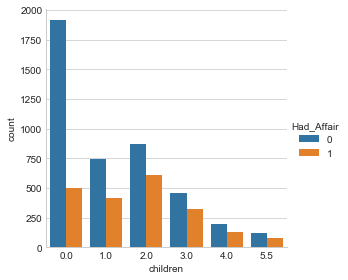

In [14]:
sns.factorplot('children', data = df, hue = 'Had_Affair', kind = 'count')

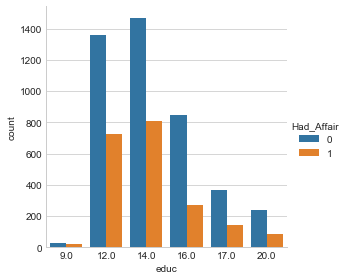

In [16]:
sns.factorplot('educ', data = df, hue = 'Had_Affair', kind = 'count')

In [17]:
occ_dummies = pd.get_dummies(df['occupation'])

In [19]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [20]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [22]:
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']

In [23]:
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [24]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis = 1)

In [25]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [26]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [27]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [28]:
X = pd.concat([X, dummies], axis = 1)

In [29]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [30]:
Y = df.Had_Affair

In [31]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [32]:
X = X.drop(['occ1','hocc1', 'affairs'], axis = 1)

In [33]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [34]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
log_model = LogisticRegression()

log_model.fit(X, Y)
    
log_model.score(X, Y)

0.7258875274897895

In [38]:
1 - Y.mean()

0.6775054979579014

In [44]:
#coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))

In [45]:
coeff_df

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [47]:
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
class_predict = log_model2.predict(X_test)

In [51]:
print(metrics.accuracy_score(Y_test, class_predict)) 

0.7349246231155779
